In [71]:
import pandas as pd
tabledata1 = []
tabledata2 = []
tabledata3 = []

def print_tables(tabledata) -> pd.DataFrame:
    
    return pd.DataFrame(tabledata, columns = ['Тип функции', 'Начальная точка','Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции', 'Количество вычисленных градиентов' ])


    

<H2>
Draw plot
</H2>

In [72]:


from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd

def plpl(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    for i in range(len(x)):
        #print(i)
        c.append(foo(x[i],y[i]))
    return c

def draw_counterplot_only(x_min, xk, w_norm, flag, foo):
    fig, ax = plt.subplots(figsize = (10,10))

    # print(xk[0])
    # print(xk[1])
    # print(fk)
    x, y = np.meshgrid(np.linspace(min(xk[0]) - 0.1, max(xk[0]) + 0.1), np.linspace(min(xk[1]) - 0.1, max(xk[1]) + 0.1))
    

    #x, y = np.meshgrid(np.linspace(xk[0][0], xk[0][-1], 1000), np.linspace(xk[1][0], xk[1][-1], 1000))
    x, y = xk[0], xk[1]
    z = foo(x, y)
    print(z)
    #rea = foo(xk[0], xk[1])
    #print(rea)

    #построим линии уровня
    ax.contour(x, y, z)
    #траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    #подписи к осям
    ax.set_xlabel('$x$', fontsize = 15)
    ax.set_ylabel('$y$', fontsize = 15)
    ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 16})

    #создадим сетку 
    plt.grid(linestyle = '-')

    plt.show()

    pass

def draw_all(x0, x_min, xk, w_norm, flag, foo):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    #ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    ax1.plot_surface(x,y,z, rstride=1, cstride=1, cmap = "viridis")
    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(20, 145)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    # построим линии уровня
    ax2.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    # k = range(len(w_norm))
    # #x, y = np.meshgrid(k , w_norm)
    # ax3.plot(k, w_norm)
    # ax3.set_xlabel('$k$')
    # ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    # ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass




<H2> EPS </H2>

<H2> Golden Ratio </H2>

In [73]:
import numpy as np
import math

def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk > e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


<H2> Conjugate gradient</H2>

In [85]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize


x0 = [-1, -2]
e = 10 ** (-2)

def conjugate_gradient(foo, flag = 0, eps = e, x = x0, flag1 = 0):

    x_, y_ = Symbol('x'), Symbol('y')
    grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')

    
    f = lambda x: foo(x[0], x[1])
    anti_grad = lambda x: -grad_f(x[0], x[1])
    
    n_f = 0
    n_g = 0
    n_d = 0

    kappa_k = 0.5
    gammak = 0.8   

    # wk -- k-направление спуска, w_norm -- норма вектора направления w
    #||wk|| <= eps -- критерий останова 
    w_norm = []
    xk = [[], []]    
    fk = []

    wk = anti_grad(x)
    n_g += 1
    w_norm.append(np.linalg.norm(wk))  

    pk = wk
    xk[0].append(x[0])
    xk[1].append(x[1])
    fk.append(f(x))

    while w_norm[-1] >= eps:

        n_d += 1
        
        #метод наискорейшего спуска
        temp = 0
        phi_k = lambda kappa: f(x + kappa * pk)   
        
        if flag1 == 0:
            kappa_k, temp = method_goldenRatio(phi_k, 1/2, 0, eps/1000)
        elif flag1 == 1:
            kappa_k, n, temp = optimize.golden(phi_k, brack = (0, 0.5), full_output=True)      
        
        x = x + kappa_k * pk
        n_f += temp

        #w_norm[-1] = norm wk1, w_norm[-2] = norm wk,
        wk1 = anti_grad(x)
        n_g += 1
        w_norm.append(np.linalg.norm(wk1))        
        
        if n_d % 2 == 0:
            gammak = 0
        else:
            if flag == 0: #conjugate
                gammak = (w_norm[-1] ** 2) / np.dot(wk, pk)
            elif flag == 1: #Reeves
                gammak = (w_norm[-1] ** 2) / (w_norm[-2] ** 2 )
            elif flag == 2: #Riber         
                gammak = np.dot(wk1 - wk, wk1) / (w_norm[-2] ** 2)
        
        pk = gammak * pk + wk1
        
        #pk = pk1
        wk = wk1

        xk[0].append(x[0])
        xk[1].append(x[1])
        #print(x)
        #print(xk)
        fk.append(f(x))
        #print(fk)

    
    return x, xk, w_norm, n_f, n_g, n_d, fk


<H2> Print function </H2>

In [86]:

from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

#x0 = [-1,-2]
def print_res(foo, x0 = x0, e_help = 2, flag = 0):

    #tabledata = []

    x_, y_ = Symbol('x'), Symbol('y')

    eps = 10**(-e_help)

    print("\n", ' ' * 30, "Методы градиентного спуска","\n")
    print("Дано:")
    print("-" * 24)
    print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    print("Начальное приближение:    (x, y) =", x0)
    print(" Точность приближения:    eps =", eps)
    print("-" * 24)

    for i in range (3):
        #temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Метод сопряженных градиентов"
            print("\n", ' ' * 30, "Метод сопряженных градиентов\n")
        elif i == 1:
            method_name = "Метод Флетчера - Ривса"
            print("\n", ' ' * 30, "Метод Флетчера - Ривса")
        elif i == 2:
            method_name = "Метод Полака - Рибьера"
            print("\n", ' ' * 30, "Метод Полака - Рибьера")
        #if i == 0 | i == 2:
        
        x_min, xk, w_norm, n_f, n_g , n_d, fk = conjugate_gradient(foo, i, eps, x0, flag)
        #temp.append(f'Квадратичная функция')    
        #temp.append(method_name)
        #temp += [ x0, method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g ]
        #tabledata1.append(temp)
        print("           Точка минимума функции:  x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        print("Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        print("              Количество итераций:  k =",   n_d)#len(w_norm) - 1)
        print("    Количество вычислений функции:  n_f =", n_f)
        print("Количество вычисленных градиентов:  n_g =", n_g)
        draw_all(x0, x_min, xk, w_norm, i, foo)
        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
        plt.show()
    
    #a = print_tables(tabledata)


    pass

<H1>
Квадратичная функция
</H1>


                                Методы градиентного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = 5*x**2 + 4*x*y + 8.94427190999916*x + 2*y**2 + 8.94427190999916*y - 35
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод сопряженных градиентов

           Точка минимума функции:  x_min = [0.0, -2.24]
Значение функции в точке минимума:  f(x_min) = -45.0
              Количество итераций:  k = 2
    Количество вычислений функции:  n_f = 50
Количество вычисленных градиентов:  n_g = 3


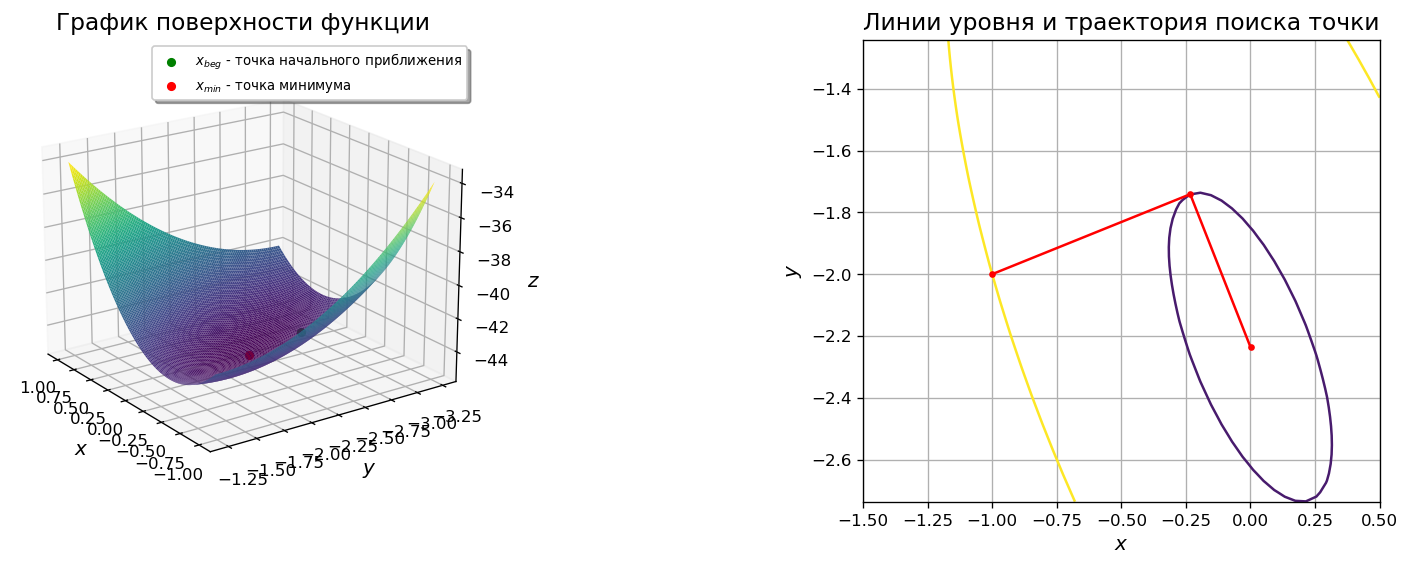


                                Метод Флетчера - Ривса
           Точка минимума функции:  x_min = [0.0, -2.24]
Значение функции в точке минимума:  f(x_min) = -45.0
              Количество итераций:  k = 2
    Количество вычислений функции:  n_f = 50
Количество вычисленных градиентов:  n_g = 3


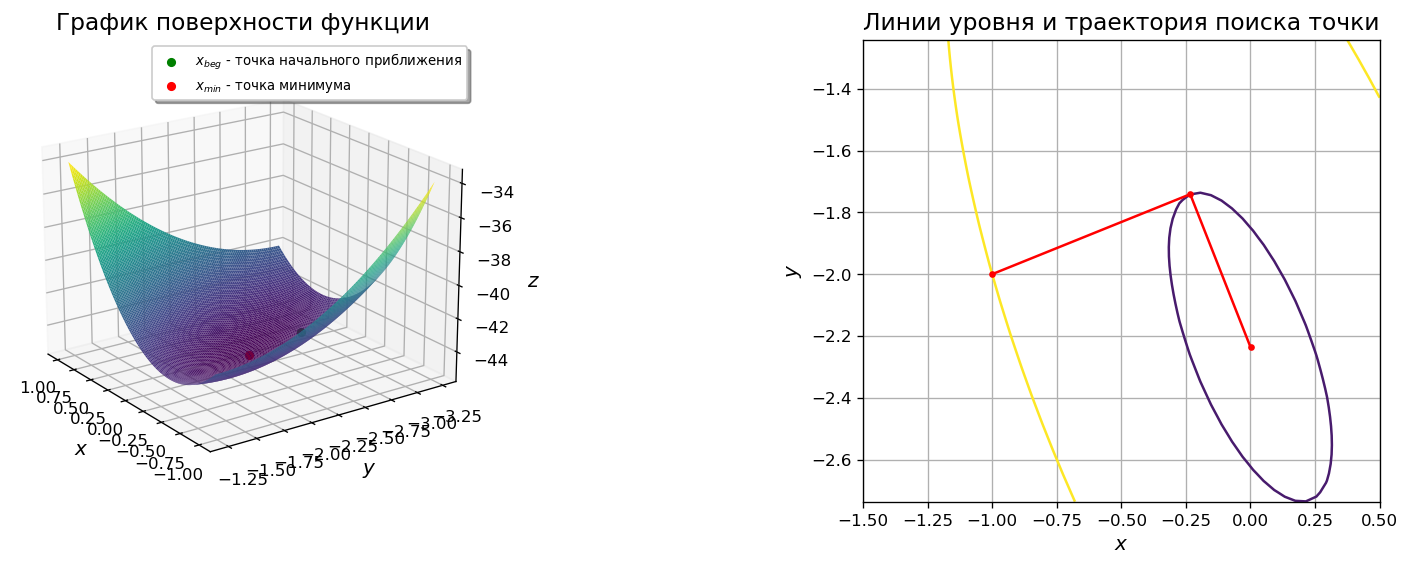


                                Метод Полака - Рибьера
           Точка минимума функции:  x_min = [-0.0, -2.24]
Значение функции в точке минимума:  f(x_min) = -45.0
              Количество итераций:  k = 2
    Количество вычислений функции:  n_f = 50
Количество вычисленных градиентов:  n_g = 3


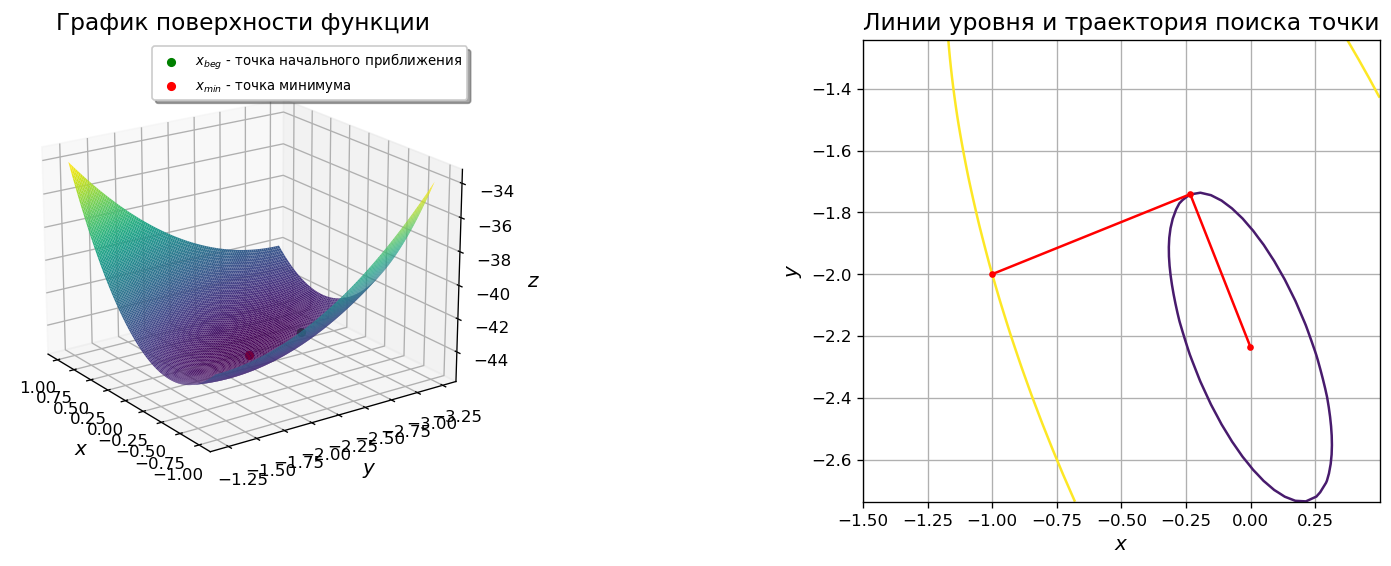


                                Методы градиентного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 50*(x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод сопряженных градиентов

           Точка минимума функции:  x_min = [1.0, 1.0]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 11
    Количество вычислений функции:  n_f = 549
Количество вычисленных градиентов:  n_g = 12


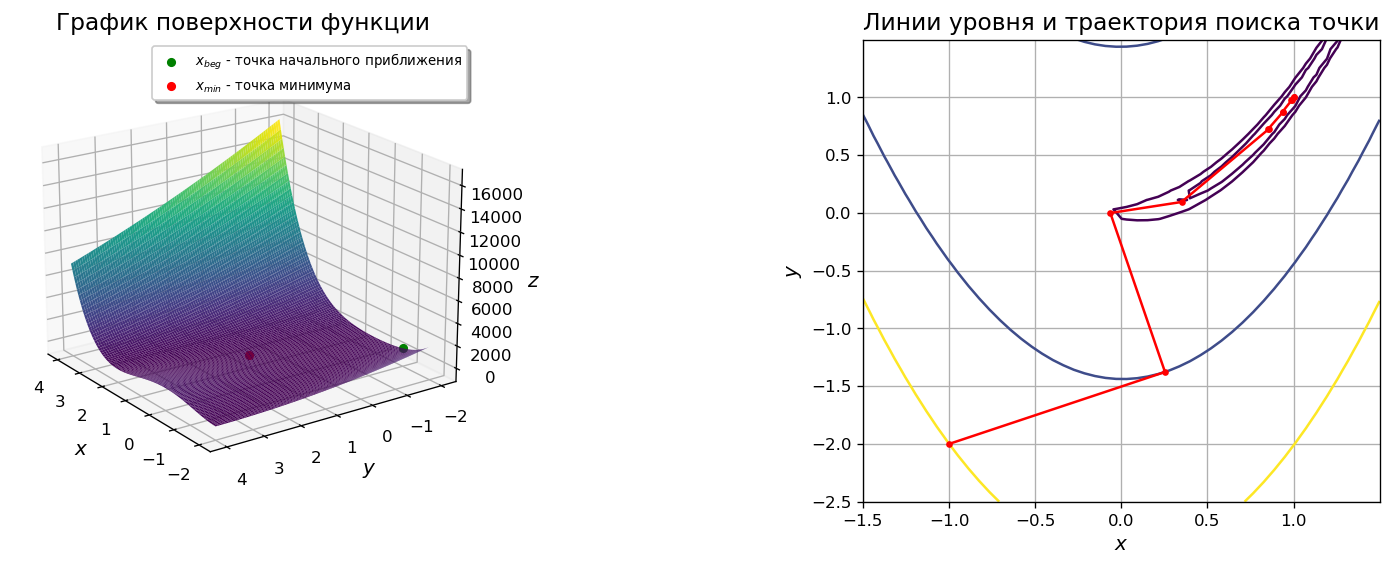


                                Метод Флетчера - Ривса
           Точка минимума функции:  x_min = [1.0, 1.0]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 11
    Количество вычислений функции:  n_f = 549
Количество вычисленных градиентов:  n_g = 12


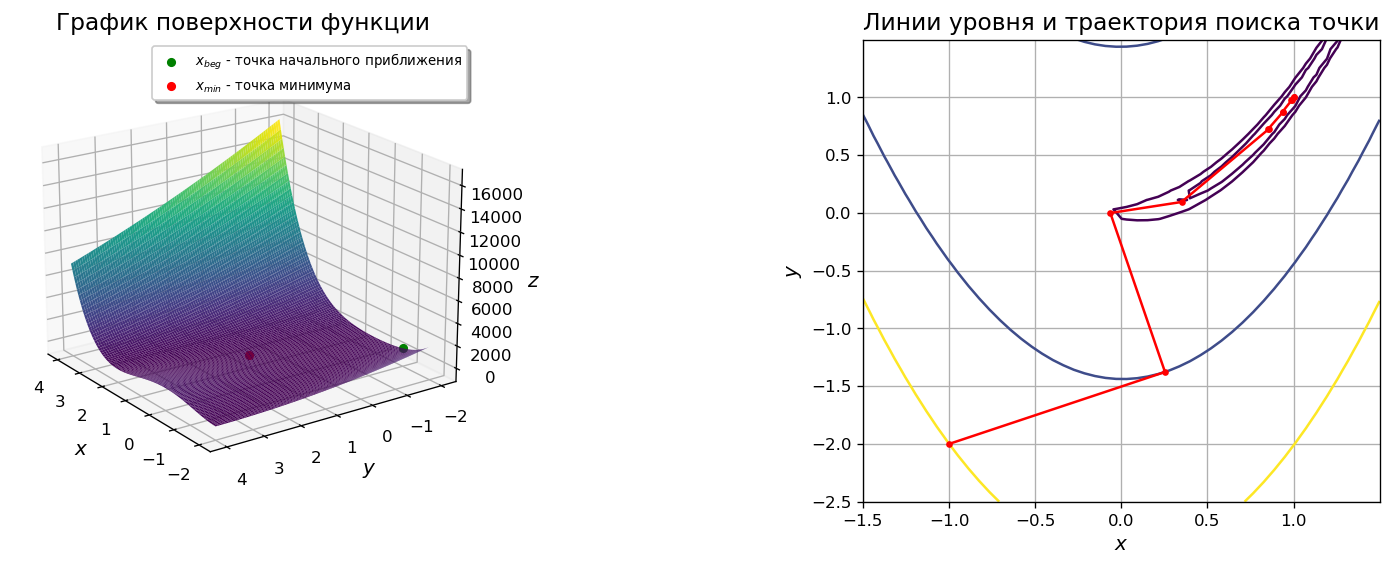


                                Метод Полака - Рибьера
           Точка минимума функции:  x_min = [1.0, 1.0]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 11
    Количество вычислений функции:  n_f = 549
Количество вычисленных градиентов:  n_g = 12


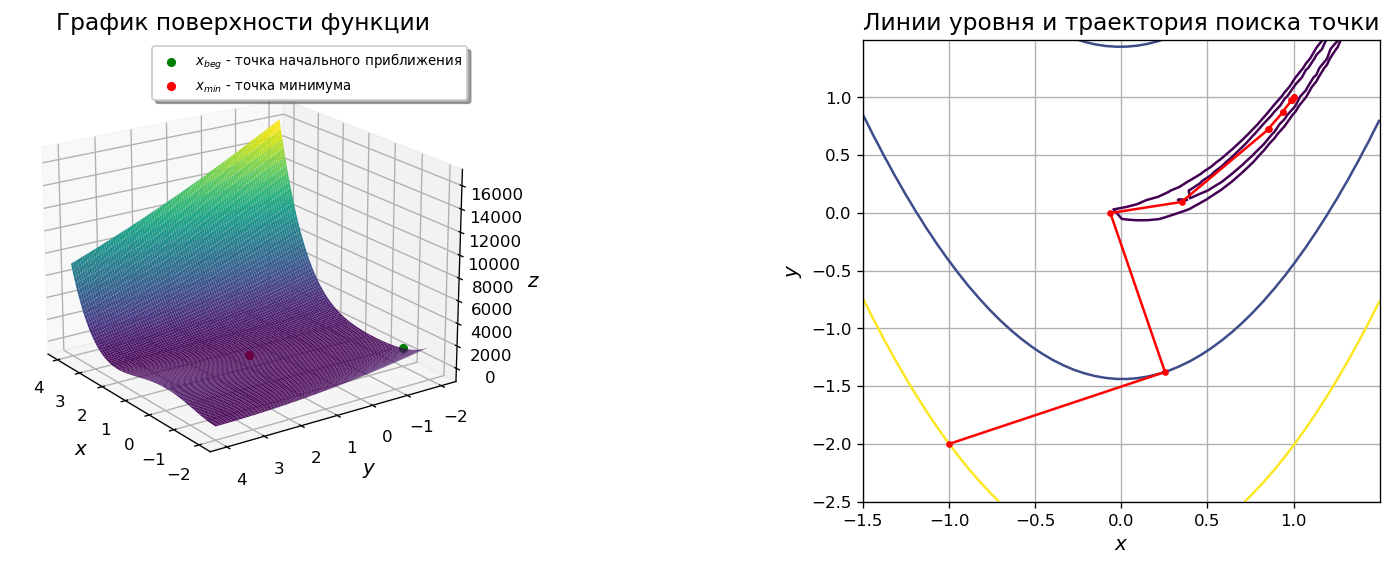


                                Методы градиентного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 200*(x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод сопряженных градиентов

           Точка минимума функции:  x_min = [1.0, 1.0]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 71
    Количество вычислений функции:  n_f = 3670
Количество вычисленных градиентов:  n_g = 72


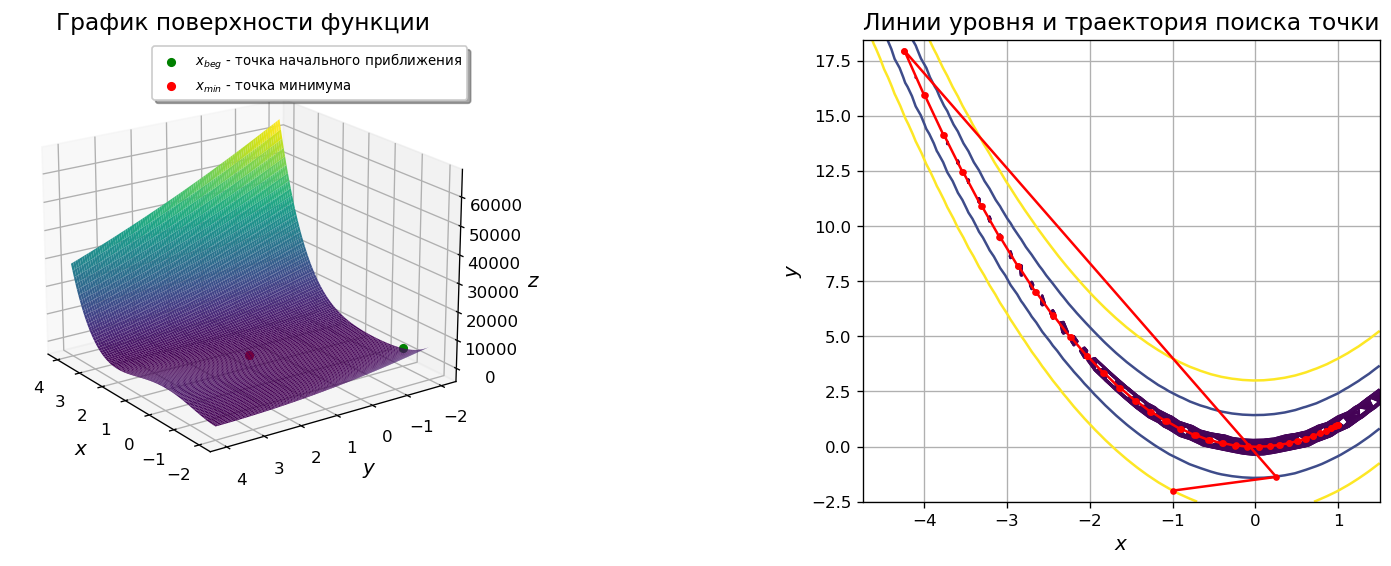


                                Метод Флетчера - Ривса
           Точка минимума функции:  x_min = [1.0, 1.0]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 71
    Количество вычислений функции:  n_f = 3670
Количество вычисленных градиентов:  n_g = 72


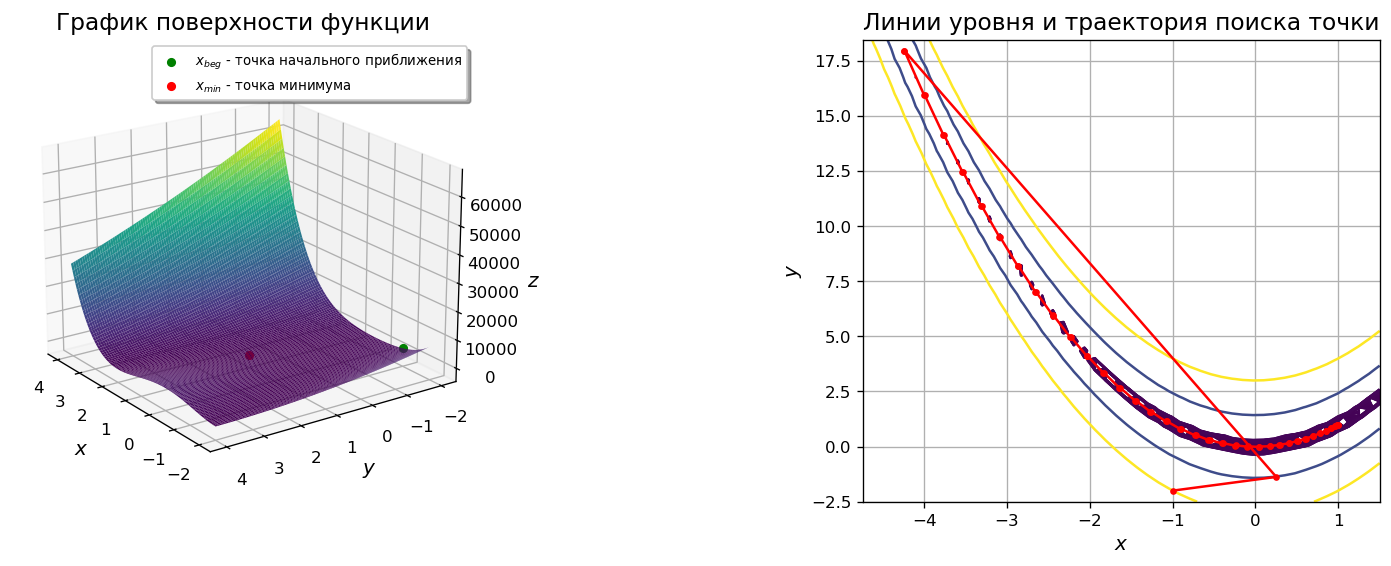


                                Метод Полака - Рибьера
           Точка минимума функции:  x_min = [1.0, 1.0]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 71
    Количество вычислений функции:  n_f = 3670
Количество вычисленных градиентов:  n_g = 72


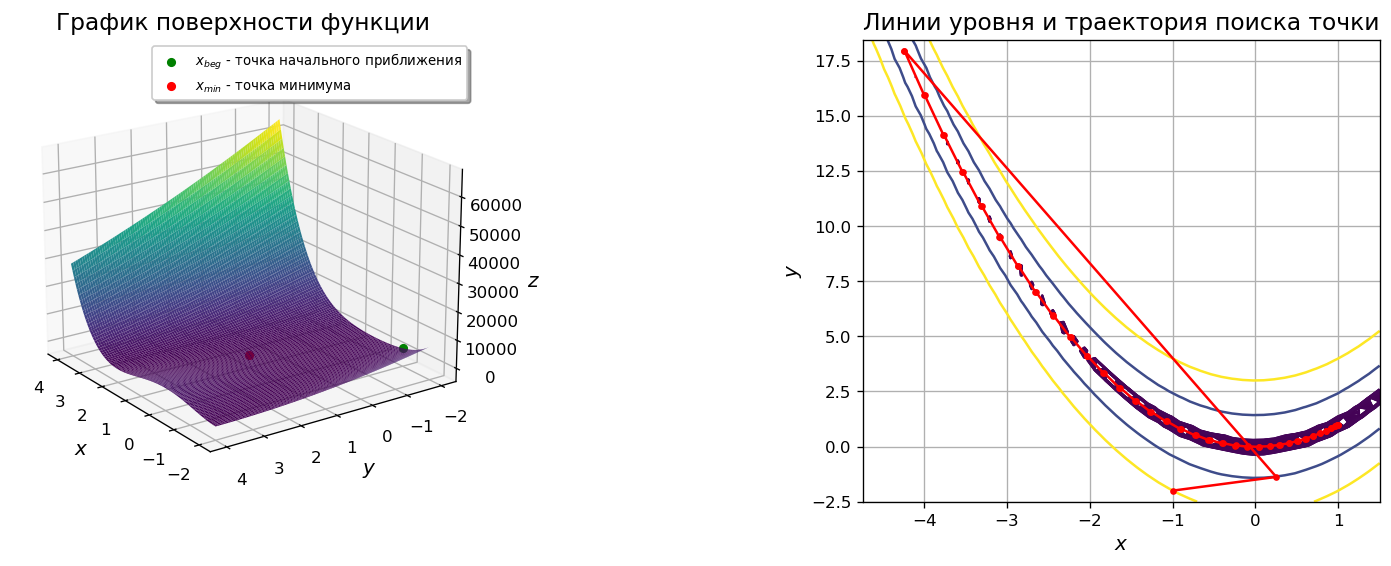

In [93]:


e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]
#foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
print_res(foo, x0, 2, 0)

alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22
print_res(foo, x0, 2, 1)

alpha = 200

foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
print_res(foo, x0, 2, 1)

#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

#foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16



<H1> Функция Розенброка alpha = 50 ,  alpha = 200</H1>


In [78]:
from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd


alpha = 200

e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

#foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16

def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk > e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


x_, y_ = Symbol('x'), Symbol('y')
grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')


# x = [-1, -2] -- дефолтное начальное приближение 
# flag = 0 / 1 --  метод наискорейшего спуска / метод дробления шага
def conjugate_gradient(foo, flag = 0, x = x0):
    
    f = lambda x: foo(x[0], x[1])
    anti_grad = lambda x: -grad_f(x[0], x[1])
    
    n_f = 0
    n_g = 0
    n_d = 0

    kappa_k = 0.5
    gammak = 0.8   

    # wk -- k-направление спуска, w_norm -- норма вектора направления w
    #||wk|| <= eps -- критерий останова 
    w_norm = []
    xk = [[], []]    
    fk = []

    wk = anti_grad(x)
    n_g += 1
    w_norm.append(np.linalg.norm(wk))  

    pk = wk
    xk[0].append(x[0])
    xk[1].append(x[1])
    fk.append(f(x))

    while w_norm[-1] >= eps:

        n_d += 1
        
        #метод наискорейшего спуска
        temp = 0
        phi_k = lambda kappa: f(x + kappa * pk)   
        kappa_k, n, temp = optimize.golden(phi_k, brack = (0, 0.5), full_output=True)         
        #kappa_k, temp = method_goldenRatio(phi_k, 1/2, 0, eps/100)
        x = x + kappa_k * pk
        n_f += temp

        #w_norm[-1] = norm wk1, w_norm[-2] = norm wk,
        wk1 = anti_grad(x)
        n_g += 1
        w_norm.append(np.linalg.norm(wk1))        
        
        if n_d % 4 == 0:
            gammak = 0

        else:
            if flag == 0: #conjugate
                #gammak = (np.dot(wk1, wk1) / np.dot(wk, pk))
                gammak = (w_norm[-1] ** 2) / np.dot(wk, pk)
            elif flag == 1: #Reeves
                gammak = (w_norm[-1] ** 2) / (w_norm[-2] ** 2 )

            elif flag == 2: #Riber         
                gammak = np.dot(wk1 - wk, wk1) / (w_norm[-2] ** 2)

        pk = gammak * pk + wk1
        
        #pk = pk1
        wk = wk1

        xk[0].append(x[0])
        xk[1].append(x[1])
        #print(x)
        #print(xk)
        fk.append(f(x))
        #print(fk)

    
    return x, xk, w_norm, n_f, n_g, n_d, fk







print("\n", ' ' * 30, "Методы градиентного спуска","\n")
print("Дано:")
print("-" * 24)
print("      Целевая функция:    f(x, y) =", foo(x_,y_))
print("Начальное приближение:    (x, y) =", x0)
print(" Точность приближения:    eps =", eps)
print("-" * 24)

for i in range (3):
    temp = []
    #print("\n" + "_" * 80)

    if i == 0:
        method_name = "Метод сопряженных градиентов"
        print("\n", ' ' * 30, "Метод сопряженных градиентов\n")
    elif i == 1:
        method_name = "Метод Флетчера - Ривса"
        print("\n", ' ' * 30, "Метод Флетчера - Ривса")
    elif i == 2:
        method_name = "Метод Полака - Рибьера"
        print("\n", ' ' * 30, "Метод Полака - Рибьера")
    #if i == 0 | i == 2:
    
    x_min, xk, w_norm, n_f, n_g , n_d, fk = conjugate_gradient(foo, i)
    temp.append(f'Функция Розенброка alpha = 200')    
    #temp.append(method_name)
    temp += [ x0, method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g ]
    tabledata1.append(temp)
    print("           Точка минимума функции:  x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
    print("Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
    print("              Количество итераций:  k =",   n_d)#len(w_norm) - 1)
    print("    Количество вычислений функции:  n_f =", n_f)
    print("Количество вычисленных градиентов:  n_g =", n_g)
    #draw_all(x0, x_min, xk, w_norm, i, foo)
    #print(xk)
    #draw_counterplot_only(x_min, xk, w_norm, i, fk)
    #plt.show()

#a = pd.DataFrame(tabledata, columns = ['Функция', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции', 'Количество вычисленных градиентов' ])

#print(tabledata)
a = print_tables(tabledata1)
#print(w_norm[-2])



                                Методы градиентного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 200*(x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод сопряженных градиентов

           Точка минимума функции:  x_min = [0.99, 0.99]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 61
    Количество вычислений функции:  n_f = 3366
Количество вычисленных градиентов:  n_g = 62

                                Метод Флетчера - Ривса
           Точка минимума функции:  x_min = [0.99, 0.99]
Значение функции в точке минимума:  f(x_min) = 0.0
              Количество итераций:  k = 61
    Количество вычислений функции:  n_f = 3366
Количество вычисленных градиентов:  n_g = 62

                                Метод Полака - Рибьера
           Точка минимума функции:  x_min = [1.0, 1.0]
Значение функции в

In [79]:
a.style.set_caption('Зависимость')


,Тип функции,Начальная точка,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
0,Функция Розенброка alpha = 50,"[-1, -2]",Метод сопряженных градиентов,"[0.99, 0.98]",0.000000,9,457,10
1,Функция Розенброка alpha = 50,"[-1, -2]",Метод Флетчера - Ривса,"[0.99, 0.98]",0.000000,9,457,10
2,Функция Розенброка alpha = 50,"[-1, -2]",Метод Полака - Рибьера,"[1.0, 1.0]",0.000000,13,659,14
3,Функция Розенброка alpha = 200,"[-1, -2]",Метод сопряженных градиентов,"[0.99, 0.99]",0.000000,61,3366,62
4,Функция Розенброка alpha = 200,"[-1, -2]",Метод Флетчера - Ривса,"[0.99, 0.99]",0.000000,61,3366,62
5,Функция Розенброка alpha = 200,"[-1, -2]",Метод Полака - Рибьера,"[1.0, 1.0]",0.000000,45,2423,46


In [80]:
from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd


alpha = 1

e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]

tabledata2 = []

for aj in range(5):

    if aj == 0:
        x0 = [-1, -2]
    elif aj == 1:
        x0 = [0, 0]
    elif aj == 2:
        x0 = [-10, -8]
    elif aj == 3:
        x0 = [10, -22]
    elif aj == 4:
        x0 = [-14, -24]

    #foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
    foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
    #foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

    #foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16

    def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
        tau = (math.sqrt(5) + 1) / 2
        n_f = 0
        Ak, Bk = a, b
        lk = Bk - Ak
        Xk1 = Bk - (Bk - Ak) / tau
        Xk2 = Ak + (Bk - Ak) / tau
        
        y1, y2 = f(Xk1), f(Xk2)
        n_f += 2

        while lk > e:
            if y1 < y2:
                Bk = Xk2
                Xk2 = Xk1
                Xk1 = Ak + Bk - Xk2
                y2 = y1
                y1 = f(Xk1)
                n_f += 1
            else:
                
                Ak = Xk1
                Xk1 = Xk2
                Xk2 = Ak + Bk - Xk1
                y1 = y2
                y2 = f(Xk2)
                n_f += 1
            lk = Bk - Ak
        return (Ak + Bk) / 2, n_f


    x_, y_ = Symbol('x'), Symbol('y')
    grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')


    # x = [-1, -2] -- дефолтное начальное приближение 
    # flag = 0 / 1 --  метод наискорейшего спуска / метод дробления шага
    def conjugate_gradient(foo, flag = 0, x = x0):
        
        f = lambda x: foo(x[0], x[1])
        anti_grad = lambda x: -grad_f(x[0], x[1])
        
        n_f = 0
        n_g = 0
        n_d = 0

        kappa_k = 0.5
        gammak = 0.8   

        # wk -- k-направление спуска, w_norm -- норма вектора направления w
        #||wk|| <= eps -- критерий останова 
        w_norm = []
        xk = [[], []]    
        fk = []

        wk = anti_grad(x)
        n_g += 1
        w_norm.append(np.linalg.norm(wk))  

        pk = wk
        xk[0].append(x[0])
        xk[1].append(x[1])
        fk.append(f(x))

        while w_norm[-1] >= eps:

            n_d += 1
            
            #метод наискорейшего спуска
            temp = 0
            phi_k = lambda kappa: f(x + kappa * pk)   
            #kappa_k = optimize.golden(phi_k, brack = (0, 0.5))         
            kappa_k, temp = method_goldenRatio(phi_k, 1/2, 0, eps/1000)
            x = x + kappa_k * pk
            n_f += temp

            #w_norm[-1] = norm wk1, w_norm[-2] = norm wk,
            wk1 = anti_grad(x)
            n_g += 1
            w_norm.append(np.linalg.norm(wk1))        
            
            if n_d % 2 == 0:
                gammak = 0
            else:
                if flag == 0: #conjugate
                    gammak = (w_norm[-1] ** 2) / np.dot(wk, pk)
                elif flag == 1: #Reeves
                    gammak = (w_norm[-1] ** 2) / (w_norm[-2] ** 2 )
                elif flag == 2: #Riber         
                    gammak = np.dot(wk1 - wk, wk1) / (w_norm[-2] ** 2)
            
            pk = gammak * pk + wk1
            
            #pk = pk1
            wk = wk1

            xk[0].append(x[0])
            xk[1].append(x[1])
            #print(x)
            #print(xk)
            fk.append(f(x))
            #print(fk)

        
        return x, xk, w_norm, n_f, n_g, n_d, fk





    # print("\n", ' ' * 30, "Методы градиентного спуска","\n")
    # print("Дано:")
    # print("-" * 24)
    # print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    # print("Начальное приближение:    (x, y) =", x0)
    # print(" Точность приближения:    eps =", eps)
    # print("-" * 24)

    for i in range (3):
        temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Метод сопряженных градиентов"
            #print("\n", ' ' * 30, "Метод сопряженных градиентов\n")
        elif i == 1:
            method_name = "Метод Флетчера - Ривса"
            #print("\n", ' ' * 30, "Метод Флетчера - Ривса")
        elif i == 2:
            method_name = "Метод Полака - Рибьера"
            #print("\n", ' ' * 30, "Метод Полака - Рибьера")
        #if i == 0 | i == 2:
        
        x_min, xk, w_norm, n_f, n_g , n_d, fk = conjugate_gradient(foo, i)
        temp.append(f'Квадратичная функция')    
        #temp.append(method_name)
        temp += [ x0, method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g ]
        tabledata2.append(temp)
        # print("           Точка минимума функции:  x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        # print("Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        # print("              Количество итераций:  k =",   n_d)#len(w_norm) - 1)
        # print("    Количество вычислений функции:  n_f =", n_f)
        # print("Количество вычисленных градиентов:  n_g =", n_g)
        #draw_all(x0, x_min, xk, w_norm, i, foo)
        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
        #plt.show()


    #a = pd.DataFrame(tabledata, columns = ['Функция', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции', 'Количество вычисленных градиентов' ])

    #print(tabledata)
    b = print_tables(tabledata2)
    #print(w_norm[-2])



In [81]:
c = b.sort_values('Метод')
c

,Тип функции,Начальная точка,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
2,Квадратичная функция,"[-1, -2]",Метод Полака - Рибьера,"[-0.0, -2.24]",-45.0,2,50,3
5,Квадратичная функция,"[0, 0]",Метод Полака - Рибьера,"[0.0, -2.24]",-45.0,2,50,3
8,Квадратичная функция,"[-10, -8]",Метод Полака - Рибьера,"[0.0, -2.24]",-45.0,2,50,3
11,Квадратичная функция,"[10, -22]",Метод Полака - Рибьера,"[0.0, -2.24]",-45.0,2,50,3
14,Квадратичная функция,"[-14, -24]",Метод Полака - Рибьера,"[0.0, -2.24]",-45.0,2,50,3
1,Квадратичная функция,"[-1, -2]",Метод Флетчера - Ривса,"[0.0, -2.24]",-45.0,2,50,3
4,Квадратичная функция,"[0, 0]",Метод Флетчера - Ривса,"[-0.0, -2.24]",-45.0,2,50,3
7,Квадратичная функция,"[-10, -8]",Метод Флетчера - Ривса,"[-0.0, -2.24]",-45.0,2,50,3
10,Квадратичная функция,"[10, -22]",Метод Флетчера - Ривса,"[0.0, -2.24]",-45.0,2,50,3
13,Квадратичная функция,"[-14, -24]",Метод Флетчера - Ривса,"[0.0, -2.24]",-45.0,3,75,4


In [82]:
from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd


alpha = 50

e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]

tabledata3 = []

for aj in range(4):

    if aj == 0:
        x0 = [-1, -2]
    elif aj == 1:
        x0 = [0, 0]
    elif aj == 2:
        x0 = [-3, -5]
    elif aj == 3:
        x0 = [10, 9]

    foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
    #foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
    #foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

    #foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16

    def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
        tau = (math.sqrt(5) + 1) / 2
        n_f = 0
        Ak, Bk = a, b
        lk = Bk - Ak
        Xk1 = Bk - (Bk - Ak) / tau
        Xk2 = Ak + (Bk - Ak) / tau
        
        y1, y2 = f(Xk1), f(Xk2)
        n_f += 2

        while lk > e:
            if y1 < y2:
                Bk = Xk2
                Xk2 = Xk1
                Xk1 = Ak + Bk - Xk2
                y2 = y1
                y1 = f(Xk1)
                n_f += 1
            else:
                
                Ak = Xk1
                Xk1 = Xk2
                Xk2 = Ak + Bk - Xk1
                y1 = y2
                y2 = f(Xk2)
                n_f += 1
            lk = Bk - Ak
        return (Ak + Bk) / 2, n_f


    x_, y_ = Symbol('x'), Symbol('y')
    grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')


    # x = [-1, -2] -- дефолтное начальное приближение 
    # flag = 0 / 1 --  метод наискорейшего спуска / метод дробления шага
    def conjugate_gradient(foo, flag = 0, x = x0):
        
        f = lambda x: foo(x[0], x[1])
        anti_grad = lambda x: -grad_f(x[0], x[1])
        
        n_f = 0
        n_g = 0
        n_d = 0

        kappa_k = 0.5
        gammak = 0.8   

        # wk -- k-направление спуска, w_norm -- норма вектора направления w
        #||wk|| <= eps -- критерий останова 
        w_norm = []
        xk = [[], []]    
        fk = []

        wk = anti_grad(x)
        n_g += 1
        w_norm.append(np.linalg.norm(wk))  

        pk = wk
        xk[0].append(x[0])
        xk[1].append(x[1])
        fk.append(f(x))

        while w_norm[-1] >= eps:

            n_d += 1
            
            #метод наискорейшего спуска
            temp = 0
            phi_k = lambda kappa: f(x + kappa * pk)   
            #kappa_k = optimize.golden(phi_k, brack = (0, 0.5))         
            kappa_k, temp = method_goldenRatio(phi_k, 1/2, 0, eps/1000)
            x = x + kappa_k * pk
            n_f += temp

            #w_norm[-1] = norm wk1, w_norm[-2] = norm wk,
            wk1 = anti_grad(x)
            n_g += 1
            w_norm.append(np.linalg.norm(wk1))        
            
            if n_d % 2 == 0:
                gammak = 0
            else:
                if flag == 0: #conjugate
                    gammak = (w_norm[-1] ** 2) / np.dot(wk, pk)
                elif flag == 1: #Reeves
                    gammak = (w_norm[-1] ** 2) / (w_norm[-2] ** 2 )
                elif flag == 2: #Riber         
                    gammak = np.dot(wk1 - wk, wk1) / (w_norm[-2] ** 2)
            
            pk = gammak * pk + wk1
            
            #pk = pk1
            wk = wk1

            xk[0].append(x[0])
            xk[1].append(x[1])
            #print(x)
            #print(xk)
            fk.append(f(x))
            #print(fk)

        
        return x, xk, w_norm, n_f, n_g, n_d, fk





    # print("\n", ' ' * 30, "Методы градиентного спуска","\n")
    # print("Дано:")
    # print("-" * 24)
    # print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    # print("Начальное приближение:    (x, y) =", x0)
    # print(" Точность приближения:    eps =", eps)
    # print("-" * 24)

    for i in range (3):
        temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Метод сопряженных градиентов"
            #print("\n", ' ' * 30, "Метод сопряженных градиентов\n")
        elif i == 1:
            method_name = "Метод Флетчера - Ривса"
            #print("\n", ' ' * 30, "Метод Флетчера - Ривса")
        elif i == 2:
            method_name = "Метод Полака - Рибьера"
            #print("\n", ' ' * 30, "Метод Полака - Рибьера")
        #if i == 0 | i == 2:
        
        x_min, xk, w_norm, n_f, n_g , n_d, fk = conjugate_gradient(foo, i)
        temp.append(f'Функция Розендброка')    
        #temp.append(method_name)
        temp += [ x0, method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g ]
        tabledata3.append(temp)
        # print("           Точка минимума функции:  x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        # print("Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        # print("              Количество итераций:  k =",   n_d)#len(w_norm) - 1)
        # print("    Количество вычислений функции:  n_f =", n_f)
        # print("Количество вычисленных градиентов:  n_g =", n_g)
        #draw_all(x0, x_min, xk, w_norm, i, foo)
        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
        #plt.show()


    #a = pd.DataFrame(tabledata, columns = ['Функция', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции', 'Количество вычисленных градиентов' ])

    #print(tabledata)
    d = print_tables(tabledata3)
    #print(w_norm[-2])



In [83]:
e = d.sort_values('Начальная точка')
e


,Тип функции,Начальная точка,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
6,Функция Розендброка,"[-3, -5]",Метод сопряженных градиентов,"[1.01, 1.02]",0.0,2894,72350,2895
7,Функция Розендброка,"[-3, -5]",Метод Флетчера - Ривса,"[1.0, 1.0]",0.0,1287,32175,1288
8,Функция Розендброка,"[-3, -5]",Метод Полака - Рибьера,"[1.01, 1.02]",0.0,1068,26700,1069
0,Функция Розендброка,"[-1, -2]",Метод сопряженных градиентов,"[1.01, 1.02]",0.0,399,9975,400
1,Функция Розендброка,"[-1, -2]",Метод Флетчера - Ривса,"[1.0, 1.01]",0.0,406,10150,407
2,Функция Розендброка,"[-1, -2]",Метод Полака - Рибьера,"[1.01, 1.02]",0.0,124,3100,125
3,Функция Розендброка,"[0, 0]",Метод сопряженных градиентов,"[1.0, 1.0]",0.0,25,625,26
4,Функция Розендброка,"[0, 0]",Метод Флетчера - Ривса,"[1.0, 1.0]",0.0,25,625,26
5,Функция Розендброка,"[0, 0]",Метод Полака - Рибьера,"[1.0, 1.0]",0.0,25,625,26
9,Функция Розендброка,"[10, 9]",Метод сопряженных градиентов,"[1.0, 1.0]",0.0,131,3275,132


In [84]:
from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd


alpha = 50

e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]

tabledata3 = []

for aj in range(2):

    if aj == 0:
        alpha = 50
    elif aj == 1:
        alpha = 200

    foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
    #foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
    #foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

    #foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16

    def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
        tau = (math.sqrt(5) + 1) / 2
        n_f = 0
        Ak, Bk = a, b
        lk = Bk - Ak
        Xk1 = Bk - (Bk - Ak) / tau
        Xk2 = Ak + (Bk - Ak) / tau
        
        y1, y2 = f(Xk1), f(Xk2)
        n_f += 2

        while lk > e:
            if y1 < y2:
                Bk = Xk2
                Xk2 = Xk1
                Xk1 = Ak + Bk - Xk2
                y2 = y1
                y1 = f(Xk1)
                n_f += 1
            else:
                
                Ak = Xk1
                Xk1 = Xk2
                Xk2 = Ak + Bk - Xk1
                y1 = y2
                y2 = f(Xk2)
                n_f += 1
            lk = Bk - Ak
        return (Ak + Bk) / 2, n_f


    x_, y_ = Symbol('x'), Symbol('y')
    grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')


    # x = [-1, -2] -- дефолтное начальное приближение 
    # flag = 0 / 1 --  метод наискорейшего спуска / метод дробления шага
    def conjugate_gradient(foo, flag = 0, x = x0):
        
        f = lambda x: foo(x[0], x[1])
        anti_grad = lambda x: -grad_f(x[0], x[1])
        
        n_f = 0
        n_g = 0
        n_d = 0

        kappa_k = 0.5
        gammak = 0.8   

        # wk -- k-направление спуска, w_norm -- норма вектора направления w
        #||wk|| <= eps -- критерий останова 
        w_norm = []
        xk = [[], []]    
        fk = []

        wk = anti_grad(x)
        n_g += 1
        w_norm.append(np.linalg.norm(wk))  

        pk = wk
        xk[0].append(x[0])
        xk[1].append(x[1])
        fk.append(f(x))

        while w_norm[-1] >= eps:

            n_d += 1
            
            #метод наискорейшего спуска
            temp = 0
            phi_k = lambda kappa: f(x + kappa * pk)   
            kappa_k = optimize.golden(phi_k, brack = (0, 0.5))         
            #kappa_k, temp = method_goldenRatio(phi_k, 1/2, 0, eps/1000)
            x = x + kappa_k * pk
            n_f += temp

            #w_norm[-1] = norm wk1, w_norm[-2] = norm wk,
            wk1 = anti_grad(x)
            n_g += 1
            w_norm.append(np.linalg.norm(wk1))        
            
            if n_d % 2 == 0:
                gammak = 0
            else:
                if flag == 0: #conjugate
                    gammak = (w_norm[-1] ** 2) / np.dot(wk, pk)
                elif flag == 1: #Reeves
                    gammak = (w_norm[-1] ** 2) / (w_norm[-2] ** 2 )
                elif flag == 2: #Riber         
                    gammak = np.dot(wk1 - wk, wk1) / (w_norm[-2] ** 2)
            
            pk = gammak * pk + wk1
            
            #pk = pk1
            wk = wk1

            xk[0].append(x[0])
            xk[1].append(x[1])
            #print(x)
            #print(xk)
            fk.append(f(x))
            #print(fk)

        
        return x, xk, w_norm, n_f, n_g, n_d, fk





    # print("\n", ' ' * 30, "Методы градиентного спуска","\n")
    # print("Дано:")
    # print("-" * 24)
    # print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    # print("Начальное приближение:    (x, y) =", x0)
    # print(" Точность приближения:    eps =", eps)
    # print("-" * 24)

    for i in range (3):
        temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Метод сопряженных градиентов"
            #print("\n", ' ' * 30, "Метод сопряженных градиентов\n")
        elif i == 1:
            method_name = "Метод Флетчера - Ривса"
            #print("\n", ' ' * 30, "Метод Флетчера - Ривса")
        elif i == 2:
            method_name = "Метод Полака - Рибьера"
            #print("\n", ' ' * 30, "Метод Полака - Рибьера")
        #if i == 0 | i == 2:
        
        x_min, xk, w_norm, n_f, n_g , n_d, fk = conjugate_gradient(foo, i)
        temp.append(f'Функция Розендброка')    
        #temp.append(method_name)
        temp += [ x0, method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g ]
        tabledata3.append(temp)
        # print("           Точка минимума функции:  x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        # print("Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        # print("              Количество итераций:  k =",   n_d)#len(w_norm) - 1)
        # print("    Количество вычислений функции:  n_f =", n_f)
        # print("Количество вычисленных градиентов:  n_g =", n_g)
        #draw_all(x0, x_min, xk, w_norm, i, foo)
        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
        #plt.show()


    #a = pd.DataFrame(tabledata, columns = ['Функция', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции', 'Количество вычисленных градиентов' ])

    #print(tabledata)
    d = print_tables(tabledata3)
    #print(w_norm[-2])
d.style.set_caption('AAAA')



,Тип функции,Начальная точка,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
0,Функция Розендброка,"[-1, -2]",Метод сопряженных градиентов,"[1.0, 1.0]",0.000000,11,0,12
1,Функция Розендброка,"[-1, -2]",Метод Флетчера - Ривса,"[1.0, 1.0]",0.000000,11,0,12
2,Функция Розендброка,"[-1, -2]",Метод Полака - Рибьера,"[1.0, 1.0]",0.000000,11,0,12
3,Функция Розендброка,"[-1, -2]",Метод сопряженных градиентов,"[1.0, 1.0]",0.000000,71,0,72
4,Функция Розендброка,"[-1, -2]",Метод Флетчера - Ривса,"[1.0, 1.0]",0.000000,71,0,72
5,Функция Розендброка,"[-1, -2]",Метод Полака - Рибьера,"[1.0, 1.0]",0.000000,71,0,72
